## SVMs and the kernel trick for non-linear decision boundaries

Consider the dataset below where we have two features, X and Y, with each point assigned to one of two classes. The two classes are generally grouped into clusters that are nearly linearly separable.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# make sample dataset - features stored in X, class labels stored in y
X, y = make_blobs(n_samples=100, n_features = 2, centers=2, cluster_std=1, random_state=0) 
# create two classes instead of 3
y[y==2] = 0

# create training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2, random_state=1)

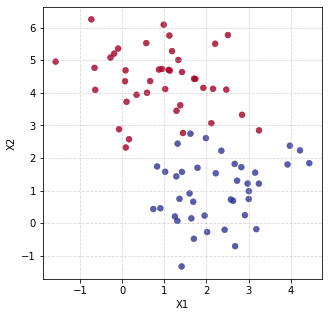

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (5,5))
sctr = plt.scatter(X_train[:,0],X_train[:,1], c = y_train, 
                   cmap = plt.get_cmap('RdYlBu'), alpha = 0.8, 
                   linewidth = 0.5, s = 35)
plt.xlabel('X1', fontsize = 10)
plt.ylabel('X2', fontsize = 10)
plt.grid(True, alpha = 0.5, linestyle = '--')
plt.show()





We can see that the two classes are nearly linearly separable. Therefore, we cannot fit a hard-hargin linear SVM. To fit a soft margin linear SVM model, we can implement this through LinearSVC module, or we can use the SVC module with a linear kernel. We will explore the later since we will extend this to use kernels for non-linear classification.

For soft-margin linear SVMs we are solving the following constrained optimization problem: <br>


minimize $(\textbf{w}, b, \zeta) \quad \quad\quad \frac{1}{2}\textbf{w}^T\textbf{w} + C \sum_{i=1}^{m}\zeta^{i}$

subject to: $\quad \quad t^i(\textbf{w}^{T}\textbf{x}^{i} + b) \geq 1 - \zeta^i$ and $\zeta^i \geq 0$ for $i$ = 1,2 $\dots m$

where: 

$\textbf{w}$ is a vector of coefficients for the linear decision boundary,

$\textbf{x}$ is a vector of instances,

$\zeta^{i}$ is a slack variable that measures how much a given instance violates the margins,

$C$ is a loss term (hyperparameter) that acts to regularize the model by trading off margin violations and the coefficients of the decision boundary hyperplane 

### Overview of theory
The derivation presented here is a condensed summary of SVM theory multiple references [1,2,3]. The basic idea behind support vector machines is that we want to try and fit a plane between these two classes that has the widest possible margin between the two classes. Here we denote the red points as the negative class, and the blue points as positive class. 

For a new point, say $\overline{\textbf{u}}$, we want to determine if this point belongs to the positive or negative class (see figure below). 

![](https://drive.google.com/uc?id=1hP0UO208LWf7o-CLgY1sI1nbUD4Q3Y9t)

To do so, we take the projection of $\overline{\textbf{u}}$ onto $\overline{\textbf{w}}$ (dot product) and if that exceeds some value $c$ we say that the new point is in the positive class. In general, the decision boundary can be expressed as:

$\overline{\textbf{w}}\cdot\overline{\textbf{u}} + b \geq 0$ $\quad$ (1) 

We can then write this equality for all points in the negative ($\overline{\textbf{x}}_{-}$) and positive ($\overline{\textbf{x}}_{+}$) classes as: 

$\overline{\textbf{w}}\cdot\overline{\textbf{x}}_{+} + b \geq 1$

$\overline{\textbf{w}}\cdot\overline{\textbf{x}}_{-} + b \leq 1$

We can make a mathematical simplication by introducing the variable $y_i$ such that $y_i$ = -1 for the negative class and $y_i$ = +1 for the positive class. This reduces the two equation above to a single inequality, which forms the constraint on out optimization problem.

$y_{i}(\overline{\textbf{w}}\cdot\overline{\textbf{x}}_{i} + b) -1 \geq 0$ $\quad$ (2)

As mentioned previously, the objective is to maximize the margin between positive and negative classes. But how do we express the distance between the two 'gutters' of the street? Consider two points that lie on each margin boundary as shown in the figure below.

![](https://drive.google.com/uc?id=1A5y1RWbxM86gvwJkFYue5LEQsP-7CnQE)

If we subtract the vectors extending from the origin to each point, we obtain the vector $\overline{\textbf{x}}_{+} - \overline{\textbf{x}}_{-}$, and if we project that onto the unit normal of $\overline{\textbf{w}}$, we can obtain the width of the margin that we wish to maximize:

maximize $\quad \quad (\overline{\textbf{x}}_{+} - \overline{\textbf{x}}_{-})\cdot \frac{\overline{\textbf{w}}}{||\overline{\textbf{w}}||}$

which simplifies to: 

maximize $\quad \frac{2}{||\overline{\textbf{w}}||} \quad$ (3). 

We can write this as a constrained minimization problem as follows:

minimize $(\textbf{w}, b) \quad \quad\quad \frac{1}{2}\textbf{w}^T\textbf{w}$

subject to: $\quad \quad y_{i}(\textbf{w}^{T}\textbf{x}_{i} + b) -1 \geq 0$

where: 

$\overline{\textbf{w}}$ is a vector of coefficients for the linear decision boundary,

$\overline{\textbf{x}}$ is a vector of instances 

---

In the case that the two classes are not linearly separable, we need to introduce slack variables $\zeta_{i}$ for each instance. This measures how much the ith instance violates the margins. We now have two conflicting objectives:

Our constrained optimization problem then becomes: <br>

minimize $(\textbf{w}, b, \zeta) \quad \quad\quad \frac{1}{2}\textbf{w}^T\textbf{w} + C \sum_{i=1}^{m}\zeta^{i}$

subject to: $\quad \quad y_i(\textbf{w}^{T}\textbf{x}_{i} + b) \geq 1 - \zeta^i$ and $\zeta^i \geq 0$ for $i$ = 1,2 $\dots m$

where: 

$\textbf{w}$ is a vector of coefficients for the linear decision boundary,

$\textbf{x}$ is a vector of instances,

$\zeta^{i}$ is a slack variable that measures how much a given instance violates the margins,

$C$ is a loss term (hyperparameter) that acts to regularize the model by trading off margin violations and the coefficients of the decision boundary hyperplane 

---
If we want to find the extremum of a function with constraints, we use Lagrange multipliers, which represents the minimization cost function with built-in constraints. For the linearly spearable problem we have the following:

minimize $(\textbf{w}, b, \alpha) \quad \quad\quad L = \frac{1}{2}\textbf{w}^T\textbf{w} - \sum_{i} \alpha_{i}\big[ y_{i}(\textbf{w}^{T}\textbf{x}^{i} + b) -1\big] \quad (4)$

where:

$\alpha_{i}$ are the positive Lagrange multipliers that will be non-zero for only those points that lie within the margins.

---
#### Dual problem
Given the above constrained optimization problem (known as the primal problem [2]) it is possible to express a slightly different, but closely related problem that allows us to use the kernel trick to generate non-linear decision boundaries. This is called the dual problem.

To find the extremum of (4), we take the derivatives of $L$ and set to zero:

$\frac{\partial L}{\partial w} = \overline{\textbf{w}} - \sum_{i} \alpha_i y_i \overline{\textbf{x}}_{i} = 0$

which gives:

$\overline{\textbf{w}} = \sum_{i} \alpha_i y_i \overline{\textbf{x}}_{i} = 0 \quad (5)$

Taking the derivative w.r.t $b$ yields:

$\sum_{i} \alpha_i y_i = 0 \quad (6)$

If we substitute (5) and (6) back into (4) we obtain the dual problem:

maximize $(\alpha) \quad \quad\quad L = \sum_i \alpha_i - \frac{1}{2}\sum_i \sum_j \alpha_i \alpha_j y_i y_j \overline{\textbf{x}}_i \cdot \overline{\textbf{x}}_j \quad (7)$

Note that this optimization problem is now only a function of the dot product of two features ($x_i\cdot x_j$) rather than the features themselves. Moreover, the optimization problem is only a function of the Lagrange multipliers.

Finally, since $\overline{\textbf{x}}$ is unknown, we can substitute (5) into the decision rule (1) to obtain the decision rule as a function of Lagrangian mulitpliers and the dot product of the new instance ($\overline{\textbf{u}}$) and other training instances:

$\sum_i \alpha_i y_i \overline{\textbf{x}}_i \cdot \overline{\textbf{u}} + b \geq 0 \quad$ (8)

Not only is the dual problem quicker to solve, it enables the kernel trick to be used. This is applicable when the samples are not linearly separable and allows us to transform the features to a new space where they are. Since the dual problem is expressed in terms of the dot product, we don't actually need to know the transformation, only the dot product in the transformed space. This transformation is performed using a $\textit{kernel function}$ that allows us to compute the dot product of two training instances in the transformed space, based only on the original vectors.

Some commonly used kernel function include [1]:

Linear: $\quad\quad\quad\quad K({\textbf{x}_i, \textbf{x}_j})$ = $\textbf{x}_i^{T}\textbf{x}_j$

Polynomial: $\quad\quad K({\textbf{x}_i, \textbf{x}_j})$ = $(\gamma\textbf{x}_i^{T}\textbf{x}_j + r)^d$

Gaussian RBF: $\quad K({\textbf{x}_i, \textbf{x}_j})$ = $exp(-\gamma||\textbf{x}_i - \textbf{x}_j||^2)$

Sigmoid: $\quad\quad\quad K({\textbf{x}_i, \textbf{x}_j})$ = tanh$(\gamma\textbf{x}_i^{T}\textbf{x}_j + r)$

We can then substitute these kernel functions in place for $\overline{\textbf{x}}_i \cdot \overline{\textbf{u}}$ in (8) to evaluate the decision boundary in the transformed space:

$\sum_i \alpha_i y_i K(\overline{\textbf{x}}_i \cdot \overline{\textbf{u}}) + b \geq 0 \quad$ (9)




In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# SVMs sensitive to scale of inputs, therefore, scale data using standard scaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_val_scale = scaler.fit_transform(X_val)

# define model
svm_linear = SVC(kernel='linear', C=1)

# fit model using pipeline
svm_linear.fit(X_train_scale, y_train)

# retrieve the decision function for the input values of X_scale
decision_function = svm_linear.decision_function(X_train_scale)

decision_function.shape

(80,)

The decision function outputs a value for each pair of entries in X_scale based on the decision boundary. This tells us which side of the decision boundary we are on and how far away from it we are for each instance. 

Lets plot this decision function overlaid on the measurement points.

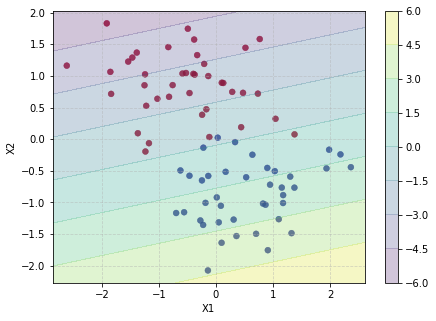

In [4]:
# overlay support vectors on data to check decision boundaries
plt.figure(figsize = (7,5))
sctr = plt.scatter(X_train_scale[:,0], X_train_scale[:,1], c = y_train, 
                   cmap = plt.get_cmap('RdYlBu'), alpha = 0.8, 
                   linewidth = 0.5, s = 35)
plt.xlabel('X1', fontsize = 10)
plt.ylabel('X2', fontsize = 10)
# create grid to evalute the decision function based on plot limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]),
                     np.linspace(ylim[0], ylim[1]))
# evaluate decision function on grid
df = svm_linear.decision_function(np.c_[np.ravel(xx), np.ravel(yy)])
# plot contour of decision function values
df = df.reshape(xx.shape)
plt.contourf(xx, yy, df, linestyles = '-', alpha = 0.25)
plt.colorbar()
plt.grid(True, alpha = 0.5, linestyle = '--')
# create grid to evalute the model decision boundaries
plt.show()

To make this a bit cleaner, lets only show the contour lines for 0 and +-1. Let's also overlay the support vectors used to define the decision boundary.

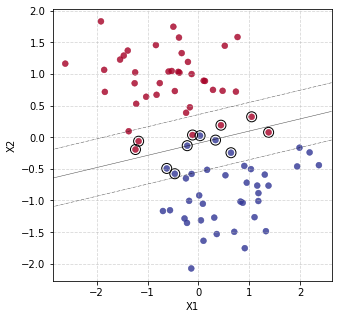

In [5]:
# define support vectors for X_scale
support_vec_indices = np.where(np.abs(decision_function) <= 1+1e-06)[0]
support_vectors = X_train_scale[support_vec_indices]

plt.figure(figsize = (5,5))
sctr = plt.scatter(X_train_scale[:,0],X_train_scale[:,1], c = y_train,
                   cmap = plt.get_cmap('RdYlBu'), alpha = 0.8, 
                   linewidth = 0.5, s = 35)
plt.xlabel('X1', fontsize = 10)
plt.ylabel('X2', fontsize = 10)
# plot contour of decision function values only showing -1, 0 and +1 contours
plt.contour(xx, yy, df, colors = 'k', levels = [-1, 0, 1], 
            linestyles = ['-.','-','-.'], linewidths = 0.5, alpha = 0.7)
plt.scatter(support_vectors[:,0], support_vectors[:,1], s = 100,
            facecolors = 'none', edgecolors = 'k')
# create grid to evalute the model decision boundaries
plt.grid(True, alpha = 0.5, linestyle = '--')
plt.show()

In the above examples, the points outlined in black are the 'support vectors' of the fit, which means they represent magin violations. The hyperparamter C defines how wide the margin is, lets see a few examples of how changing C varies the decision boundary and the support vectors.

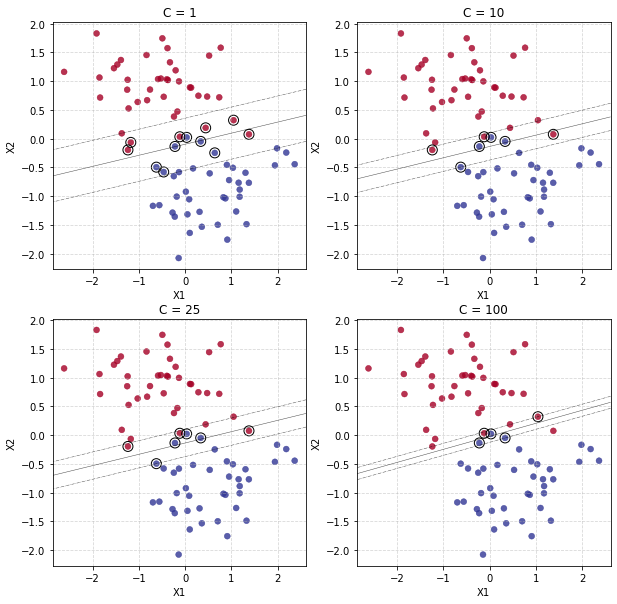

In [6]:
# C values to investigate
c_vals = [1, 10, 25, 100]

plt.figure(figsize = (10,10))

for i, C in enumerate(c_vals):
    # define model
    svm_linear = SVC(kernel='linear', C=C)

    # fit model using pipeline
    svm_linear.fit(X_train_scale, y_train)

    # retrieve the decision function for the input values of X_scale
    decision_function = svm_linear.decision_function(X_train_scale)

    plt.subplot(2,2, i+1)
    sctr = plt.scatter(X_train_scale[:,0], X_train_scale[:,1], c = y_train, 
                       cmap = plt.get_cmap('RdYlBu'), alpha = 0.8, 
                       linewidth = 0.5, s = 35)
    plt.xlabel('X1', fontsize = 10)
    plt.ylabel('X2', fontsize = 10)

    # create grid to evalute the decision function based on plot limits
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]),
                        np.linspace(ylim[0], ylim[1]))
    
    # define support vectors for X_scale
    support_vec_indices = np.where(np.abs(decision_function) <= 1+1e-06)[0]
    support_vectors = X_train_scale[support_vec_indices]
    
    # evaluate decision function on grid
    df =svm_linear.decision_function(np.c_[np.ravel(xx), np.ravel(yy)])
    # plot contour of decision function values
    df = df.reshape(xx.shape)
    # plot contour of decision function values only showing -1, 0 and +1 contours
    plt.contour(xx, yy, df, colors = 'k', levels = [-1, 0, 1], 
                linestyles = ['-.','-','-.'], linewidths = 0.5, alpha = 0.7)
    plt.scatter(support_vectors[:,0], support_vectors[:,1], s = 100,
                facecolors = 'none', edgecolors = 'k')
    plt.grid(True, alpha = 0.5, linestyle = '--')
    plt.title('C = '+str(C))
    # create grid to evalute the model decision boundaries
plt.show()

From the figures above, we can see that as the value of C increases, the number of margin violations decreases, and the decision mapping function changes slightly, though not much above C = 10. Ideally we want to select the largest margins for our model to reduce the generalization error and avoid overfitting. This could be performed through cross-validation, though is not within the scope of this notebook.

Next, let's look at how SVMs can be extended to non-linear classification problems using kernels. For this, we will tweak the make_blobs data set to create a two-cluster data set with one cluster separated into two regions by another cluster, and we will use the sklearn 'make moons' dataset.



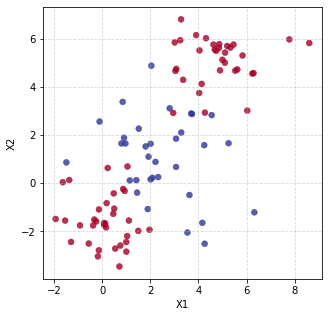

In [7]:
# make sample dataset - features stored in X, class labels stored in y
X, y = make_blobs(n_samples=100, n_features = 2, centers=[(0.5, -1.6), (2.5, 1), (4.5, 5)], cluster_std=[1.0,1.5,1], random_state=2) 
# create two classes instead of 3
y[y==2] = 0

plt.figure(figsize = (5,5))
sctr = plt.scatter(X[:,0],X[:,1], c = y, 
                   cmap = plt.get_cmap('RdYlBu'), alpha = 0.8, 
                   linewidth = 0.5, s = 35)
plt.xlabel('X1', fontsize = 10)
plt.ylabel('X2', fontsize = 10)
plt.grid(True, alpha = 0.5, linestyle = '--')
plt.show()

Lets illustrate how the linear SVM fails in this instance.

In [8]:
# create training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2, random_state=1)

# SVMs sensitive to scale of inputs, therefore, scale data using standard scaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_val_scale = scaler.fit_transform(X_val)

# define model
svm_linear = SVC(kernel='linear', C=10)

# fit model using pipeline
svm_linear.fit(X_train_scale, y_train)

# retrieve the decision function for the input values of X_scale
decision_function = svm_linear.decision_function(X_train_scale)

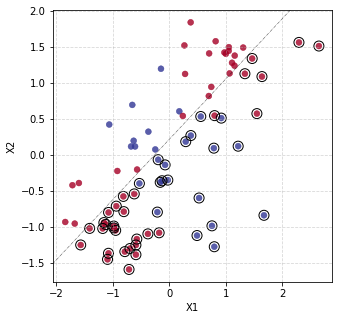

In [9]:
plt.figure(figsize = (5,5))
sctr = plt.scatter(X_train_scale[:,0], X_train_scale[:,1], c = y_train, 
                    cmap = plt.get_cmap('RdYlBu'), alpha = 0.8, 
                    linewidth = 0.5, s = 35)
plt.xlabel('X1', fontsize = 10)
plt.ylabel('X2', fontsize = 10)

# create grid to evalute the decision function based on plot limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]),
                    np.linspace(ylim[0], ylim[1]))

# define support vectors for X_scale
support_vec_indices = np.where(np.abs(decision_function) <= 1+1e-06)[0]
support_vectors = X_train_scale[support_vec_indices]

# evaluate decision function on grid
df = svm_linear.decision_function(np.c_[np.ravel(xx), np.ravel(yy)])
# plot contour of decision function values
df = df.reshape(xx.shape)
# plot contour of decision function values only showing -1, 0 and +1 contours
plt.contour(xx, yy, df, colors = 'k', levels = [-1, 0, 1], 
            linestyles = ['-.','-','-.'], linewidths = 0.5, alpha = 0.7)
plt.scatter(support_vectors[:,0], support_vectors[:,1], s = 100,
            facecolors = 'none', edgecolors = 'k')
plt.grid(True, alpha = 0.5, linestyle = '--')
# create grid to evalute the model decision boundaries
plt.show()

From the figure above, it is clear that the linear kernel cannot capture the spatial dependency in each cluster and many of the observations are within the margins/are incorrectly classified. In order to capture this non-linearity in the dataset, we can consider different kernels. Here we will consider a polynomial kernel and a radial basis function.

Kernels allow the linear SVM to be extended to higher, non-linear dimensional feature spaces without having to explicitly compute the coordinates of the data in that that space. This changes the mathematical problem from the primal problem to a dual problem. 

The dual form of the linear SVM objective using the kernel trick can be implemented as follows:


In [10]:
# define an SVM with a polynomial kernel function of degree 3
svm_poly = SVC(kernel = 'poly', degree = 3, coef0 = 2, C = 1)

# fit model using pipeline
svm_poly.fit(X_train_scale, y_train)

# retrieve the decision function for the input values of X_scale
decision_function = svm_poly.decision_function(X_train_scale)

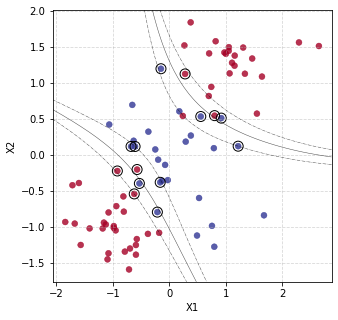

In [11]:
plt.figure(figsize = (5,5))
sctr = plt.scatter(X_train_scale[:,0], X_train_scale[:,1], c = y_train, 
                    cmap = plt.get_cmap('RdYlBu'), alpha = 0.8, 
                    linewidth = 0.5, s = 35)
plt.xlabel('X1', fontsize = 10)
plt.ylabel('X2', fontsize = 10)

# create grid to evalute the decision function based on plot limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]),
                    np.linspace(ylim[0], ylim[1]))

# define support vectors for X_scale
support_vec_indices = np.where(np.abs(decision_function) <= 1+1e-06)[0]
support_vectors = X_train_scale[support_vec_indices]

# evaluate decision function on grid
df = svm_poly.decision_function(np.c_[np.ravel(xx), np.ravel(yy)])
# plot contour of decision function values
df = df.reshape(xx.shape)
# plot contour of decision function values only showing -1, 0 and +1 contours
plt.contour(xx, yy, df, colors = 'k', levels = [-1, 0, 1], 
            linestyles = ['-.','-','-.'], linewidths = 0.5, alpha = 0.7)
plt.scatter(support_vectors[:,0], support_vectors[:,1], s = 100,
            facecolors = 'none', edgecolors = 'k')
plt.grid(True, alpha = 0.5, linestyle = '--')
# create grid to evalute the model decision boundaries
plt.show()

Here, we can clearly see that the polynomial kernel does a much better job of capturing the non-linearity in the dataset. The performance of this could be tweaked further by optimizing paramters such as C and coef0.

Finally, lets try a Gaussian radial basis function (RBF) kernel:

In [12]:
# define an SVM with a polynomial kernel function of degree 3
svm_rbf = SVC(kernel = 'rbf', gamma = 1, C = 10)

# fit model using pipeline
svm_rbf.fit(X_train_scale, y_train)

# retrieve the decision function for the input values of X_scale
decision_function = svm_rbf.decision_function(X_train_scale)

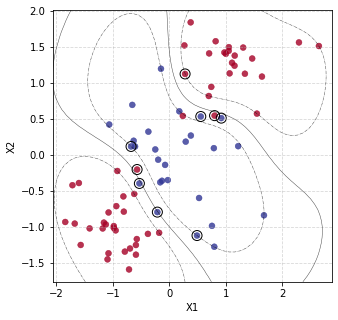

In [13]:
plt.figure(figsize = (5,5))
sctr = plt.scatter(X_train_scale[:,0], X_train_scale[:,1], c = y_train, 
                    cmap = plt.get_cmap('RdYlBu'), alpha = 0.8, 
                    linewidth = 0.5, s = 35)
plt.xlabel('X1', fontsize = 10)
plt.ylabel('X2', fontsize = 10)

# create grid to evalute the decision function based on plot limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]),
                    np.linspace(ylim[0], ylim[1]))

# define support vectors for X_scale
support_vec_indices = np.where(np.abs(decision_function) <= 1+1e-06)[0]
support_vectors = X_train_scale[support_vec_indices]

# evaluate decision function on grid
df = svm_rbf.decision_function(np.c_[np.ravel(xx), np.ravel(yy)])
# plot contour of decision function values
df = df.reshape(xx.shape)
# plot contour of decision function values only showing -1, 0 and +1 contours
plt.contour(xx, yy, df, colors = 'k', levels = [-1, 0, 1], 
            linestyles = ['-.','-','-.'], linewidths = 0.5, alpha = 0.7)
plt.scatter(support_vectors[:,0], support_vectors[:,1], s = 100,
            facecolors = 'none', edgecolors = 'k')
plt.grid(True, alpha = 0.5, linestyle = '--')
# create grid to evalute the model decision boundaries
plt.show()

The RBF kernel transforms the training instances into a much higher dimensional space than the polynomial function so we can capture more non-linearity in the decision boundary compared to the polynomial kernel. Again, we could optimize the values of $\gamma$ and $C$, but it is clear that both polynomial and RBF kernels do a much better job than the linear SVM.